# Relative Frequencies and Stopword lists

- TODO - investigate top words, adapt Eleanor text

Now we'll look at a look using relative frequencies. Relative frequencies are one way at looking at top words, through their proportional counts. Books have different lengths, so the nominal count of any given word will vary between books, so relative frequencies give us a way to compare two or more books.

In [1]:
%matplotlib inline
from htrc_features import FeatureReader

## Relative Frequencies

Here we load raw lowercased counts for one book:

In [2]:
vol1 = FeatureReader('data/mdp.39015054055697.json.bz2').first()
print("Loading tokens for", vol1.title, vol1.enumeration_chronology)
tokens = vol1.tokenlist(pages=False, pos=False, case=False)
tokens = tokens.loc['body'] # Only focus on section='body'

Loading tokens for The lord of the rings, by J. R. R. Tolkien. pt.1


To get relative frequencies, you just need to dived each token count by the total count of words.

The total can be retrieved with `tl['count'].sum()`, which takes the `count` column and sums it:

In [3]:
tokens['count'].sum()

223456

Dividing is as easy as taking the count column and diving with `/`. Run the following cell:

In [ ]:
tokens / tokens['count'].sum()

But, what if we want to save it? It's possible to save to a new column by referring with `tokens['new_column_name'] = ...`. Let's do that, saving our relative frequencies to a `rel_freq` column and sorting by the new column:

In [5]:
tokens['rel_freq'] = tokens['count'] / tokens['count'].sum()
tokens = tokens.sort_values('rel_freq', ascending=False)
tokens.head(5)

,count,rel_freq
lowercase,,
",",11861,0.053080
the,11767,0.052659
.,11174,0.050005
and,7478,0.033465
',6382,0.028560


Now, we can visualize:

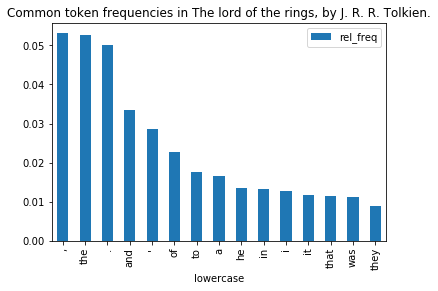

In [7]:
tokens.head(15).plot(y='rel_freq', kind='bar', title='Common token frequencies in ' + vol1.title)

### Stopword lists
Not that interesting, right?

This is where stopword lists are useful. A stopword list is a pre-built list of words to ignore. We can load one included with the Natural Language Toolkit (nltk).

In [8]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Here's how we might remove the words in our stopword list. While we're at it, let's drop words that are not alphabetical words, which will remove tokens like `,` and `1`. For now, you can just copy/paste the below code, but you're always welcome to tinker!

In [9]:
subset1 = tokens[~tokens.index.isin(stopwords.words('english')) & tokens.index.str.isalpha()]
subset1.head(5)

,count,rel_freq
lowercase,,
said,1476,0.006605
frodo,1100,0.004923
could,467,0.002090
gandalf,463,0.002072
would,452,0.002023


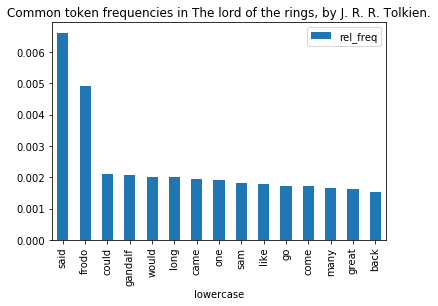

In [11]:
subset1.head(15).plot(y='rel_freq', kind='bar', title='Common token frequencies in ' + vol1.title)

# Putting it all together:

We've been working really slowly through many of these pieces, but we really didn't craft too much code along the way.  Below we have much of it all working together to answer some really specific questions about our text.

In [13]:
vol1 = FeatureReader('data/mdp.39015054055697.json.bz2').first()
tokens = vol1.tokenlist(pages=False, pos=False, case=False)
tokens = tokens.loc['body'] # Only focus on section='body'
subset1 = tokens[~tokens.index.isin(stopwords.words('english')) & tokens.index.str.isalpha()]

## Focusing only on a Part of Speech

Another way to look at notable words is through parts-of-speech. e.g. focusing on `NNP` (proper nouns):

In [14]:
tokens = vol1.tokenlist(pages=False, pos=True, case=True).loc['body']
proper_nouns_v1 = tokens.loc[(slice(None), ('NNP')),].sort_values('count', ascending=False) # Select NNP and sort
proper_nouns_v1['rel_freq'] = proper_nouns_v1['count'] / proper_nouns_v1['count'].sum()     # Calculate Relative frequency
proper_nouns_v1.head(5)

,,count,rel_freq
token,pos,,
Frodo,NNP,1082,0.099852
Gandalf,NNP,456,0.042082
Sam,NNP,408,0.037652
Bilbo,NNP,323,0.029808
Ring,NNP,219,0.020210


## Comparing relative frequencies

The value of relative frequencies is that it is easy to compare multiple books. First, let's load volume two of `Lord of the Rings` to compare:

In [15]:
vol2 = FeatureReader('data/mdp.39015003763490.json.bz2').first()
tokens = vol2.tokenlist(pages=False, pos=True, case=True).loc['body']
proper_nouns_v2 = tokens.loc[(slice(None), ('NNP')),].sort_values('count', ascending=False)
proper_nouns_v2['rel_freq'] = proper_nouns_v2['count'] / proper_nouns_v2['count'].sum()

In [16]:
proper_nouns_v1.head(2)

,,count,rel_freq
token,pos,,
Frodo,NNP,1082,0.099852
Gandalf,NNP,456,0.042082


In [17]:
proper_nouns_v2.head(2)

,,count,rel_freq
token,pos,,
Frodo,NNP,499,0.060026
Sam,NNP,420,0.050523


Since the index of 'token' and 'pos' is the same, you can just subtract one DataFrame from another and the code will know to align the rows (i.e. subtracting the `(Frodo, NNS)` information).

Above, we see that Frodo fell from 9% of volume 1 to 6% of volume 2. Which words increased in usage? To find that out, let's subtract the relative frequencies and sort:

In [19]:
compare_books = (proper_nouns_v2 - proper_nouns_v1)
compare_books.sort_values('rel_freq', ascending=False).dropna()

,,count,rel_freq
token,pos,,
Gollum,NNP,235.0,0.030258
Orcs,NNP,166.0,0.020949
Saruman,NNP,133.0,0.017483
Faramir,NNP,132.0,0.015907
Aragorn,NNP,85.0,0.015883
Theoden,NNP,116.0,0.013982
Smeagol,NNP,105.0,0.012883
Sam,NNP,12.0,0.012871
Legolas,NNP,84.0,0.012765


That's it!

# Exercises

Try comparing relative frequencies between two books that you choose, either using parts-of-speech or a stopword list to remove less interesting words.